In [145]:
class Task:
    key = []
    msg = []
    enc = []
    introns = []

    def __str__(self) -> str:
        return f'key: {self.key}\nmsg: {self.msg}\nenc: {self.enc}'

In [146]:
import ast

def parse_task(log_file):
    with open(log_file) as logfile:
        lines = logfile.readlines()

    task = Task()

    for line in lines:
        key, value = line.split('=')
        if 'key' in key:
            task.key = ''.join(ast.literal_eval(value))
        elif 'msg' in key:
            task.msg = ''.join(ast.literal_eval(value))
        elif 'enc' in key:
            task.enc = ''.join(ast.literal_eval(value))
        elif 'intron_len' in key:
            task.introns.append(ast.literal_eval(value))
    
    return task


In [147]:
task = parse_task('./logs.txt')
task_2 = parse_task('./logs_2.txt')

In [148]:
print(task.enc)
print(task_2.enc)

TTAGCTACACAAGAATCCTGCCCCATAACCAAACATCCTTGCATGACTTTTATTCTGTAATATCCGTAAACCTGCGACTTTGTGTAACCCAACATCCGTCTGCGATAATAATAGACAGCGATCCCGATACGACCAGGGTTCGGCTGATGTCAACAGCCGCACGCGCACCAATCAGCCAAAGGATCGATGAACGGCAAGGATTGAAGTCAGTCGAATACTGCCTTATTACGACGGCTTGGCGGTCCAGCAGGCAGGGTACTAGCACCGGAGCACAGGTTAGTAACACACCAGGACAGATTAGCTCTAGGGGCATCGGTTAAGCGTCTTACTACTGAAAGTCTGTCGTTTTGCCGAACATGTAAGATTTAGTGTAACGGGATCGGCTGAGTAAGCGATGTTAGCTTACATAGCTAATCGTACTTGCGAAACACTCAGGTCAAGCCGGTAGTATGGTACTCTTGCCGGCCATGCCCGGAATTCCCTTCTTCACGCACGAGGTCGGGAGCGTGTGGGTCGCATGCTTTTGTAAGCAGTCCGGCGGTTCGTCGTGGTTTTTATCCTTTTACTCGATGCGTTTGATATACATTTGAGGCAGTCCACTCGAGGTTGGGCTTTATCTCAGTGTACACACTTGGCGCCCTCGGACCTGAGAGCTGCGCTTTGATGAGCGTATTGGAAGGCGAACTTCGGTATTACCAATCTGGCGGTTATGGTTCCCCCGCGGGACGTCGCACCAACCCACGTTGCTGGGGTTCGGTGTATCAGGCCTGAGAGTTAATGTAGCTACGCGTTGCGGGAACCTAGAAGCCACCTATGCTACGCACCATTCTACGGTGCAGTATCCATGAGCTGCGGCTACGAAGTGGAACTGCTAGAAATTTAATCCCCTGCCTACGTCCCAACTCTGAGAGGTATCCGCATCTTTGAGAGCATACCAAAACGATCTGATTCAGTGCGTAACTGGCAATAGAATGGAACAGCGCACGGCCTTTTAGCATGA

In [149]:
from collections import Counter
import matplotlib.pyplot as plt

def count_ngrams(data, n = 2):
    chunks = [data[i:i+n] for i in range(0, len(data), n)]
    return Counter(chunks)

<BarContainer object of 0 artists>

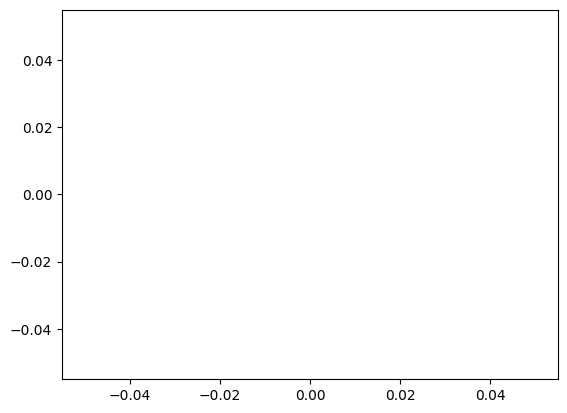

In [150]:
intron_lens = Counter(task.introns)
plt.bar(intron_lens.keys(), intron_lens.values())

<BarContainer object of 15 artists>

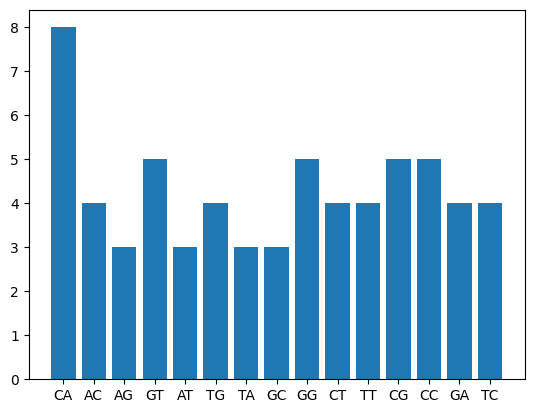

In [151]:
keys_2 = count_ngrams(task.key)
plt.bar(keys_2.keys(), keys_2.values())

<BarContainer object of 16 artists>

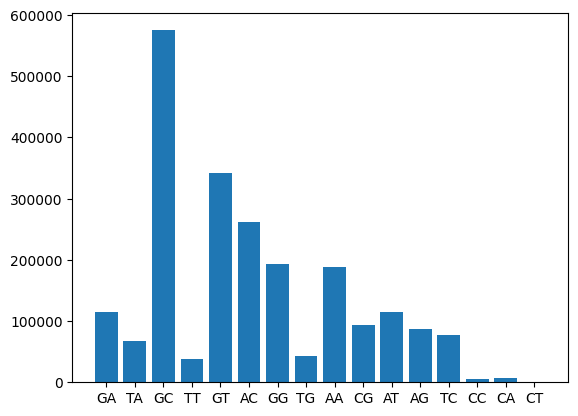

In [152]:
msgs_2 = count_ngrams(task.msg)
plt.bar(msgs_2.keys(), msgs_2.values())

<BarContainer object of 16 artists>

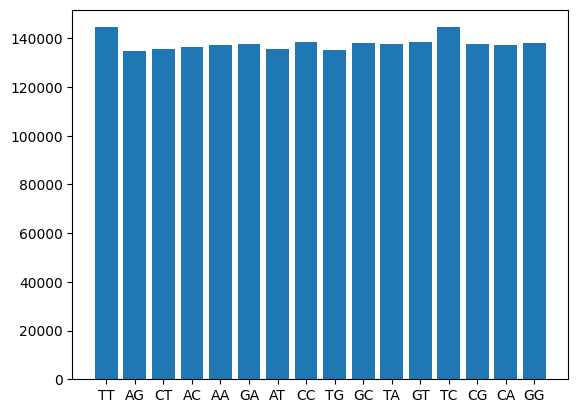

In [153]:
encs_2 = count_ngrams(task.enc)
plt.bar(encs_2.keys(), encs_2.values())

<BarContainer object of 29 artists>

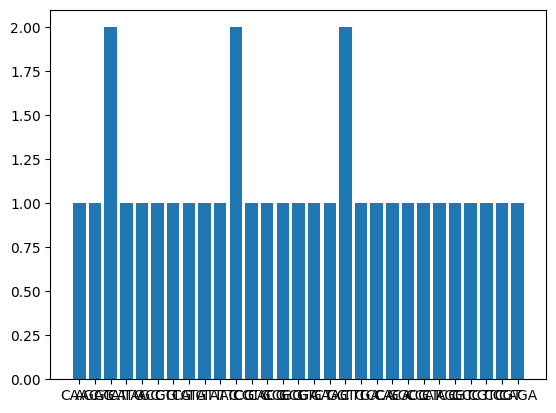

In [154]:
keys_4 = count_ngrams(task.key, n = 4)
plt.bar(keys_4.keys(), keys_4.values())

<BarContainer object of 42 artists>

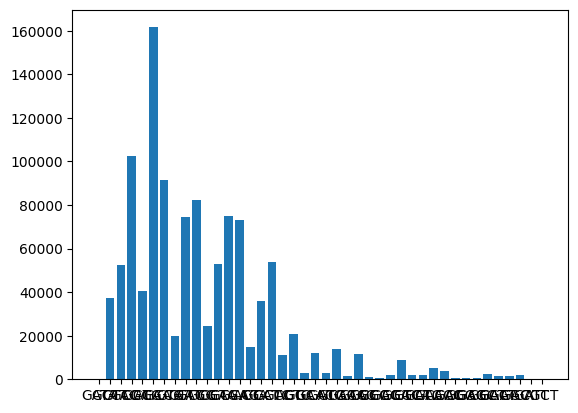

In [155]:
msgs_4 = count_ngrams(task.msg, n = 4)
plt.bar(msgs_4.keys(), msgs_4.values())

<BarContainer object of 256 artists>

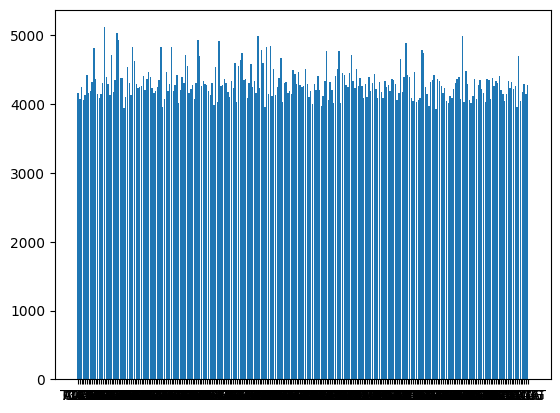

In [156]:
encs_4 = count_ngrams(task.enc, n = 4)
plt.bar(encs_4.keys(), encs_4.values())

In [158]:
infreq_4 = {x: count for x, count in encs_4.items() if count <= 4000}
infreq_4

{'AGCG': 3941,
 'ACTG': 3964,
 'GTTA': 3993,
 'GATG': 3959,
 'ACCA': 3997,
 'TTCG': 3976,
 'TCTA': 3969,
 'AGTA': 3935,
 'TCCG': 3956}